In [1]:
import sys,os
sys.path.append(os.getcwd())
from pymatgen.io.cif import CifParser,CifWriter
from pymatgen import Structure, Lattice, MPRester, Molecule
from pymatgen.analysis.adsorption import *
from pymatgen.core.surface import generate_all_slabs
from pymatgen.core.surface import  SlabGenerator
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from matplotlib import pyplot as plt
from pymatgen.core.lattice import Lattice
from ase import *
from pymatgen import *
from lmf import *
%matplotlib inline
parser = CifParser("structures/licoo2.cif")
structure = parser.get_structures()[0]
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

ModuleNotFoundError: No module named 'lmf'

In [6]:
structure
CifWriter(structure).write_file('licoo2_try.cif') 
os.system("open "+'licoo2_try.cif')

0

In [253]:
#a=structure.lattice.matrix
#a[2][2]=4
#struc=Structure(Lattice(a),structure.species,structure.cart_coords,coords_are_cartesian=True)
num_layers=9.5
slab=SlabGenerator(structure, (0,0,1),  min_slab_size=num_layers, min_vacuum_size=5,center_slab=False,in_unit_planes=True).get_slabs(bonds={("C", "O"): 2})[0]
CifWriter(slab).write_file('licoo2_new.cif') 
os.system("open "+'licoo2_new.cif')

0

In [10]:
species=[]
coords=[]
d=0
for i in structure:
    if i.species_string=="Li":
        species.append(i.species)
        coords.append(i.coords+[0,0,-.5*d])
    else:
        species.append(i.species)
        coords.append(i.coords)
a=structure.lattice.matrix.copy()
a[2][2]=a[2][2]+d
struc=Structure(Lattice(a),species,coords,coords_are_cartesian=True)       
CifWriter(struc).write_file('licoo2_'+str(struc.lattice.c)[:4]+'.cif') 
#os.system("open "+'licoo2_big.cif')
print(struc.lattice.c,structure.lattice.c)

4.992713124598566 4.992713124598566


0.0
0.0
0.03175063494000039
0.05291772490000066
0.09525190482000116
0.12700253976000156
0.22225444458000274


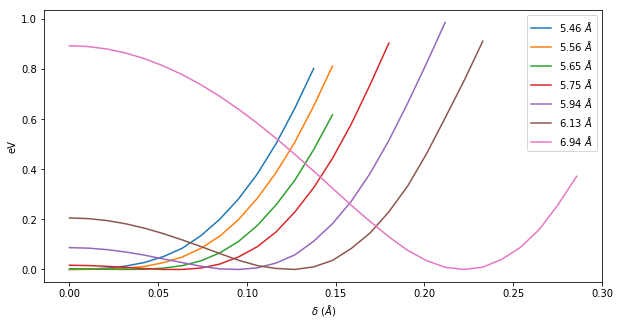

In [221]:

import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,1,figsize=(10,5))

a=np.loadtxt("Li_energy/5.46.txt")
x=a.T[0]/1.8897259885789
y=(a.T[1]-np.min(a.T[1]))*13.6056980659
print(a.T[0][np.argmin(a.T[1])]/1.8897259885789)
plt.plot(x,y,label="5.46 $\AA$")


a=np.loadtxt("Li_energy/5.56.txt")
x=a.T[0]/1.8897259885789
y=(a.T[1]-np.min(a.T[1]))*13.6056980659
print(a.T[0][np.argmin(a.T[1])]/1.8897259885789)
plt.plot(x,y,label="5.56 $\AA$")


a=np.loadtxt("Li_energy/5.65.txt")
x=a.T[0]/1.8897259885789
y=(a.T[1]-np.min(a.T[1]))*13.6056980659
print(a.T[0][np.argmin(a.T[1])]/1.8897259885789)
plt.plot(x,y,label="5.65 $\AA$")


a=np.loadtxt("Li_energy/5.75.txt")
x=a.T[0]/1.8897259885789
y=(a.T[1]-np.min(a.T[1]))*13.6056980659
print(a.T[0][np.argmin(a.T[1])]/1.8897259885789)
plt.plot(x,y,label="5.75 $\AA$")


a=np.loadtxt("Li_energy/5.94.txt")
x=a.T[0]/1.8897259885789
y=(a.T[1]-np.min(a.T[1]))*13.6056980659
print(a.T[0][np.argmin(a.T[1])]/1.8897259885789)
plt.plot(x,y,label="5.94 $\AA$")

a=np.loadtxt("Li_energy/6.13.txt")
x=a.T[0]/1.8897259885789
y=(a.T[1]-np.min(a.T[1]))*13.6056980659
print(a.T[0][np.argmin(a.T[1])]/1.8897259885789)
plt.plot(x,y,label="6.13 $\AA$")

a=np.loadtxt("Li_energy/6.94.txt")
x=a.T[0]/1.8897259885789
y=(a.T[1]-np.min(a.T[1]))*13.6056980659
print(a.T[0][np.argmin(a.T[1])]/1.8897259885789)
plt.plot(x,y,label="6.94 $\AA$")


plt.xlabel("$\delta$ ($\AA$)")
plt.ylabel("eV")
plt.legend()
plt.show()


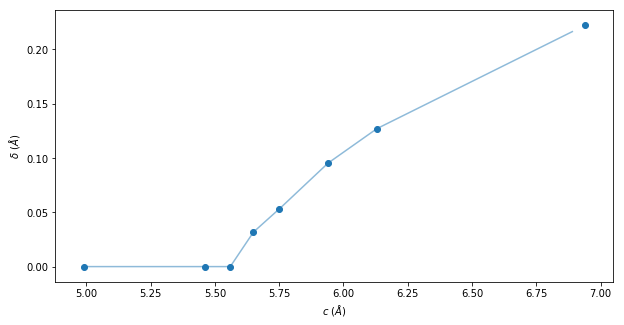

In [246]:
A=[4.99,5.46,5.56,5.65,5.75,5.94,6.13,6.94]
delta=[0,0,0,0.03175063494000039,
0.05291772490000066,
0.09525190482000116,
0.12700253976000156,
0.22225444458000274]
fig,ax=plt.subplots(1,1,figsize=(10,5))
from scipy import interpolate
f = interpolate.interp1d(A, delta)
x = np.arange(4.99, 6.9, 0.01)
y = f(x)
plt.plot(x,y,alpha=.5)
plt.scatter(A,delta)
plt.xlabel("$c$ ($\AA$)")
plt.ylabel("$\delta$ ($\AA$)")
plt.show()

In [20]:
parser = CifParser("nacoo2.cif")
structure = parser.get_structures()[0]
species=[]
coords=[]
d=1.2

for i in structure:
    if i.species_string=="Na":
        species.append(i.species)
        coords.append(i.coords+[0,0,-.5*d])
    else:
        species.append(i.species)
        coords.append(i.coords)
a=structure.lattice.matrix.copy()
a[2][2]=a[2][2]+d
struc=Structure(Lattice(a),species,coords,coords_are_cartesian=True)       
CifWriter(struc).write_file('nacoo2_big'+str(struc.lattice.c)[:4]+'.cif') 
#os.system("open "+'licoo2_big.cif')
print(struc.lattice.c,structure.lattice.c)

6.666506163601411 5.513863546854926


0.0
0.0
0.0
0.01058354498000013
0.05291772490000066
0.07408481486000092
0.09525190482000116


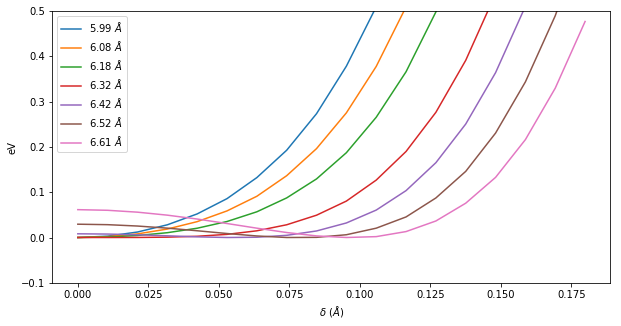

In [301]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,1,figsize=(10,5))


A=[]
delta=[]
for i in [5.99,6.08,6.18,6.32,6.42,6.52,6.61]:
    d=i
    a=np.loadtxt("Na_energy/"+str(d)+".txt")
    x=a.T[0]/1.8897259885789
    y=(a.T[1]-np.min(a.T[1]))*13.6056980659
    print(a.T[0][np.argmin(a.T[1])]/1.8897259885789)
    plt.plot(x,y,label=str(d)+" $\AA$")
    A.append(d)
    delta.append(a.T[0][np.argmin(a.T[1])]/1.8897259885789)


plt.ylim([-.1,.5])
plt.xlabel("$\delta$ ($\AA$)")
plt.ylabel("eV")
plt.legend()
plt.show()

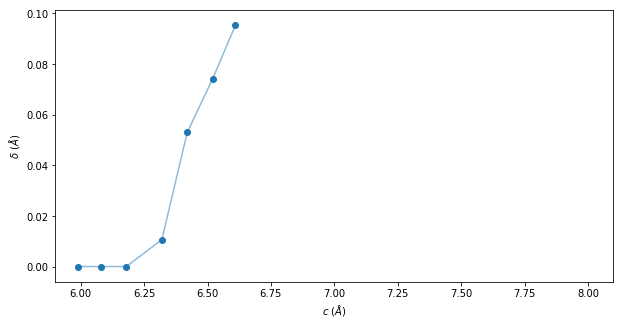

In [304]:
fig,ax=plt.subplots(1,1,figsize=(10,5))
from scipy import interpolate
f = interpolate.interp1d(A, delta)
x = np.arange(np.min(A), np.max(A), 0.01)
y = f(x)
plt.plot(x,y,alpha=.5)
plt.scatter(A,delta)
plt.xlabel("$c$ ($\AA$)")
plt.ylabel("$\delta$ ($\AA$)")
plt.xlim([5.9,8.1])
plt.show()

0.0
0.0
0.03175063494000039
0.05291772490000066
0.09525190482000116
0.12700253976000156
0.22225444458000274


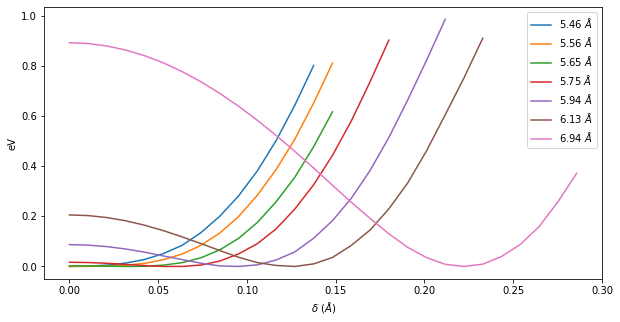

In [9]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,1,figsize=(10,5))

a=np.loadtxt("Li_energy/5.46.txt")
x=a.T[0]/1.8897259885789
y=(a.T[1]-np.min(a.T[1]))*13.6056980659
print(a.T[0][np.argmin(a.T[1])]/1.8897259885789)
plt.plot(x,y,label="5.46 $\AA$")


a=np.loadtxt("Li_energy/5.56.txt")
x=a.T[0]/1.8897259885789
y=(a.T[1]-np.min(a.T[1]))*13.6056980659
print(a.T[0][np.argmin(a.T[1])]/1.8897259885789)
plt.plot(x,y,label="5.56 $\AA$")


a=np.loadtxt("Li_energy/5.65.txt")
x=a.T[0]/1.8897259885789
y=(a.T[1]-np.min(a.T[1]))*13.6056980659
print(a.T[0][np.argmin(a.T[1])]/1.8897259885789)
plt.plot(x,y,label="5.65 $\AA$")


a=np.loadtxt("Li_energy/5.75.txt")
x=a.T[0]/1.8897259885789
y=(a.T[1]-np.min(a.T[1]))*13.6056980659
print(a.T[0][np.argmin(a.T[1])]/1.8897259885789)
plt.plot(x,y,label="5.75 $\AA$")


a=np.loadtxt("Li_energy/5.94.txt")
x=a.T[0]/1.8897259885789
y=(a.T[1]-np.min(a.T[1]))*13.6056980659
print(a.T[0][np.argmin(a.T[1])]/1.8897259885789)
plt.plot(x,y,label="5.94 $\AA$")

a=np.loadtxt("Li_energy/6.13.txt")
x=a.T[0]/1.8897259885789
y=(a.T[1]-np.min(a.T[1]))*13.6056980659
print(a.T[0][np.argmin(a.T[1])]/1.8897259885789)
plt.plot(x,y,label="6.13 $\AA$")

a=np.loadtxt("Li_energy/6.94.txt")
x=a.T[0]/1.8897259885789
y=(a.T[1]-np.min(a.T[1]))*13.6056980659
print(a.T[0][np.argmin(a.T[1])]/1.8897259885789)
plt.plot(x,y,label="6.94 $\AA$")


plt.xlabel("$\delta$ ($\AA$)")
plt.ylabel("eV")
plt.legend()
plt.show()

In [17]:
d=["5.46","5.56","5.65","5.75","5.94","6.13","6.94"]
x=[]
y=[]
z=[]
for i in d:
    a=np.loadtxt("Li_energy/"+str(i)+".txt")
    x.append(a.T[0]/1.8897259885789)
    z.append((a.T[1]-np.min(a.T[1]))*13.6056980659)
    y.append(np.ones(len(a.T[0]))*float(i))
x=np.concatenate(x).ravel()
y=np.concatenate(y).ravel()
z=np.concatenate(z).ravel()

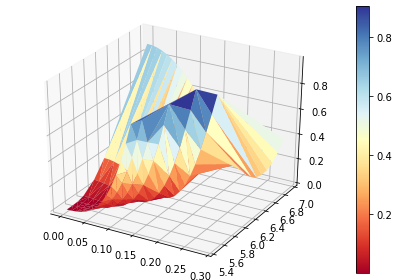

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#surf = ax.plot_trisurf(Xs, Ys, Zs, cmap=cm.jet, linewidth=0)
surf = ax.plot_trisurf(x,y,z, cmap="RdYlBu", linewidth=0)
fig.colorbar(surf)
fig.tight_layout()
plt.show()

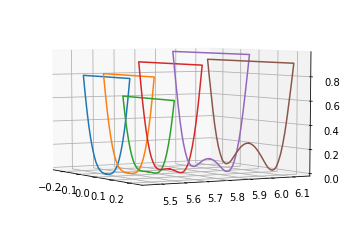

In [75]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
d=["5.46","5.56","5.65","5.75","5.94","6.13"]
x=[]
y=[]
z=[]
for i in d:
    a=np.loadtxt("Li_energy/"+str(i)+".txt")
    x=a.T[0]/1.8897259885789
    z=(a.T[1]-np.min(a.T[1]))*13.6056980659
    y=np.ones(2*len(a.T[0]))*float(i)
    xrev=[-1*j for j in x]
    x=np.hstack([x,xrev[::-1]])
    z=np.hstack([z,z[::-1]])
    ax.plot(x,y,z)
ax.view_init(elev=5., azim=-30)
#ax.set_zlim(0,.4)
ax = fig.gca(projection = '3d')
ax.pbaspect = [1.0, 9, 3.25]
plt.show()


In [53]:
x

array([ 0.        ,  0.01058354,  0.02116709,  0.03175063,  0.04233418,
        0.05291772,  0.06350127,  0.07408481,  0.08466836,  0.0952519 ,
        0.10583545,  0.11641899,  0.12700254,  0.13758608,  0.14816963,
        0.15875317,  0.16933672,  0.17992026,  0.19050381,  0.20108735,
        0.2116709 ,  0.22225444,  0.23283799, -0.23283799, -0.22225444,
       -0.2116709 , -0.20108735, -0.19050381, -0.17992026, -0.16933672,
       -0.15875317, -0.14816963, -0.13758608, -0.12700254, -0.11641899,
       -0.10583545, -0.0952519 , -0.08466836, -0.07408481, -0.06350127,
       -0.05291772, -0.04233418, -0.03175063, -0.02116709, -0.01058354,
       -0.        ])

In [77]:
len(x)/2

23.0